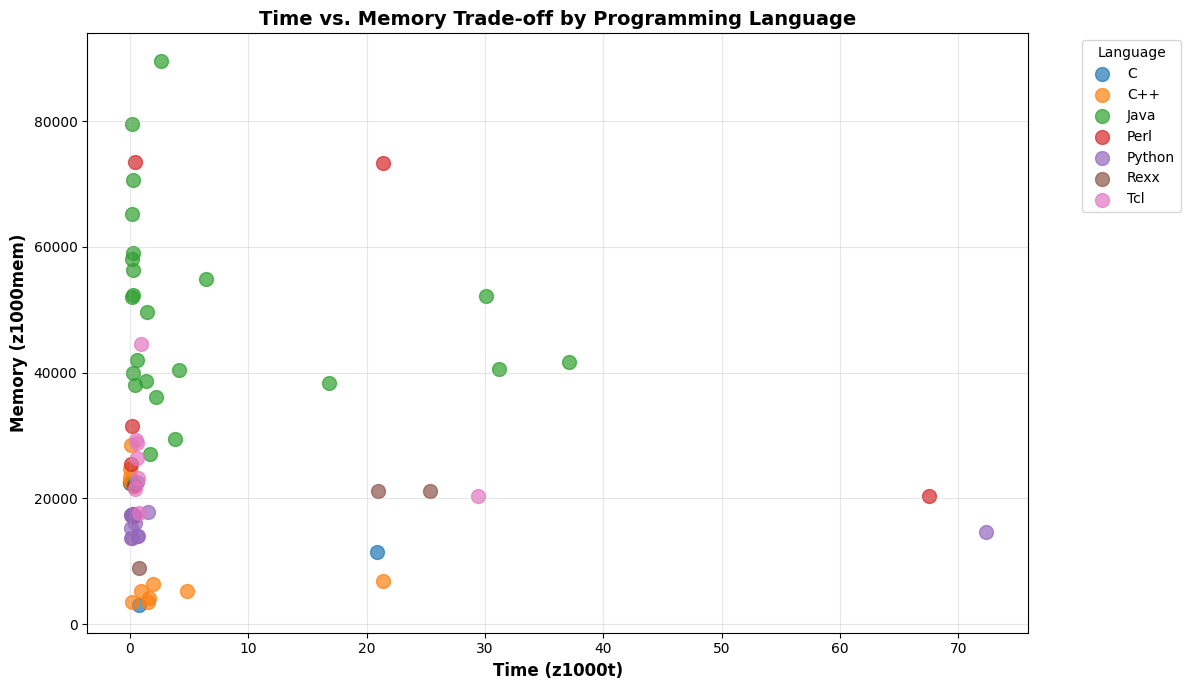

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv')

# Normalize language names to title case
df['lang'] = df['lang'].str.title()

# Filter out extreme values - keep only z1000t values <= 100
df_filtered = df[df['z1000t'] <= 100].copy()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Define colors for each language
colors = {
    'C': '#1f77b4',
    'C++': '#ff7f0e',
    'Java': '#2ca02c',
    'Perl': '#d62728',
    'Python': '#9467bd',
    'Rexx': '#8c564b',
    'Tcl': '#e377c2'
}

# Create scatter plot colored by language
for lang in sorted(df_filtered['lang'].unique()):
    lang_data = df_filtered[df_filtered['lang'] == lang]
    ax.scatter(lang_data['z1000t'], lang_data['z1000mem'],
              label=lang, s=100, alpha=0.7, color=colors.get(lang, '#000000'))

# Customize plot
ax.set_xlabel('Time (z1000t)', fontsize=12, fontweight='bold')
ax.set_ylabel('Memory (z1000mem)', fontsize=12, fontweight='bold')
ax.set_title('Time vs. Memory Trade-off by Programming Language', fontsize=14, fontweight='bold')
ax.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Graph saved as 'performance_vs_reliability_by_language.png'


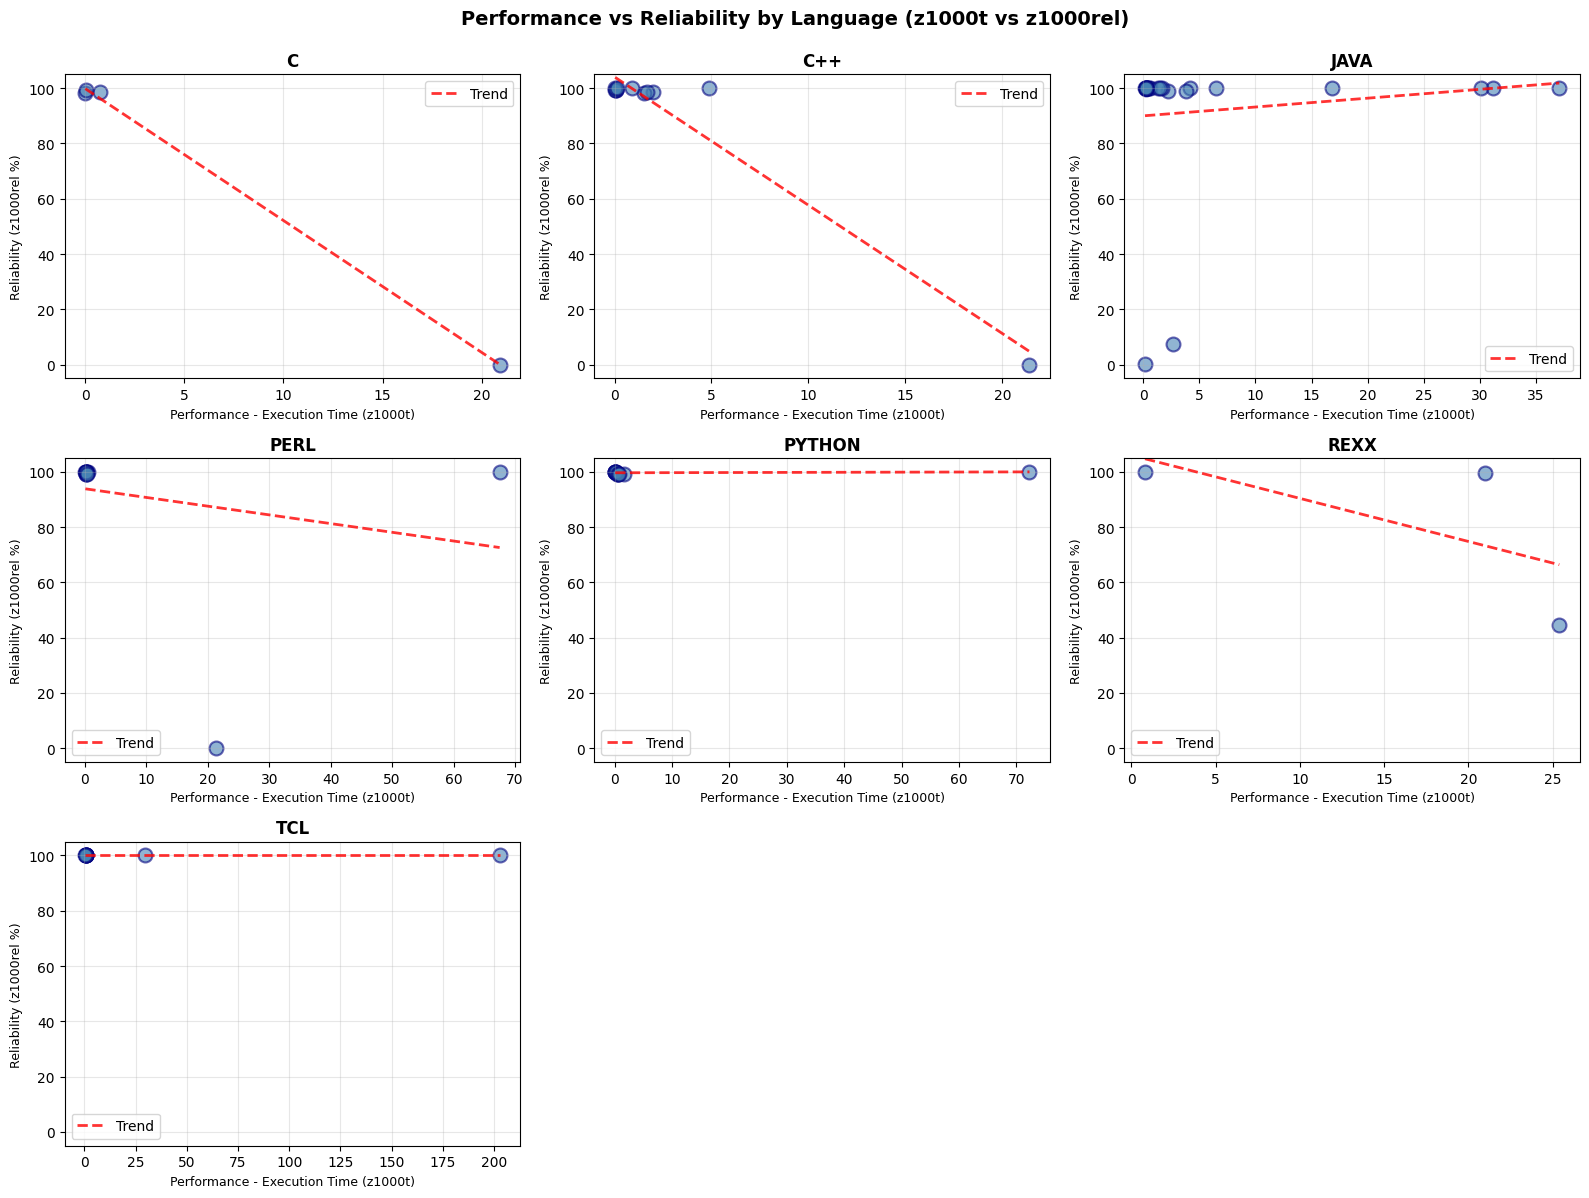


=== Summary Statistics by Language ===


C:
  Count: 4
  Performance (z1000t) - Mean: 5.43, Median: 0.40
  Reliability (z1000rel) - Mean: 73.95, Median: 98.29

C++:
  Count: 11
  Performance (z1000t) - Mean: 2.97, Median: 0.92
  Reliability (z1000rel) - Mean: 90.25, Median: 99.24

JAVA:
  Count: 24
  Performance (z1000t) - Mean: 5.94, Median: 0.98
  Reliability (z1000rel) - Mean: 91.88, Median: 100.00

PERL:
  Count: 12
  Performance (z1000t) - Mean: 7.62, Median: 0.27
  Reliability (z1000rel) - Mean: 91.48, Median: 100.00

PYTHON:
  Count: 12
  Performance (z1000t) - Mean: 6.43, Median: 0.35
  Reliability (z1000rel) - Mean: 99.68, Median: 100.00

REXX:
  Count: 3
  Performance (z1000t) - Mean: 15.74, Median: 21.00
  Reliability (z1000rel) - Mean: 81.46, Median: 99.62

TCL:
  Count: 9
  Performance (z1000t) - Mean: 26.33, Median: 0.68
  Reliability (z1000rel) - Mean: 100.00, Median: 100.00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv', index_col=0)

# Normalize language names to lowercase
df['lang'] = df['lang'].str.lower()

# Remove rows with missing z1000t or z1000rel values
df_clean = df.dropna(subset=['z1000t', 'z1000rel'])

# Get unique languages
languages = sorted(df_clean['lang'].unique())

# Calculate grid dimensions (3 columns for layout)
n_langs = len(languages)
n_cols = 3
n_rows = (n_langs + n_cols - 1) // n_cols

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

# Generate a plot for each language
for idx, lang in enumerate(languages):
    ax = axes[idx]

    # Filter data for this language
    lang_data = df_clean[df_clean['lang'] == lang]

    # Create scatter plot
    ax.scatter(lang_data['z1000t'], lang_data['z1000rel'],
               s=100, alpha=0.6, color='steelblue', edgecolors='navy', linewidth=1.5)

    # Add trend line if there are at least 2 points
    if len(lang_data) >= 2:
        z = np.polyfit(lang_data['z1000t'], lang_data['z1000rel'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(lang_data['z1000t'].min(), lang_data['z1000t'].max(), 100)
        ax.plot(x_trend, p(x_trend), "r--", linewidth=2, alpha=0.8, label='Trend')
        ax.legend(loc='best')

    # Set labels and title
    ax.set_xlabel('Performance - Execution Time (z1000t)', fontsize=9)
    ax.set_ylabel('Reliability (z1000rel %)', fontsize=9)
    ax.set_title(f'{lang.upper()}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([-5, 105])

# Hide extra subplots
for idx in range(len(languages), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Performance vs Reliability by Language (z1000t vs z1000rel)',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('performance_vs_reliability_by_language.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'performance_vs_reliability_by_language.png'")
plt.show()

# Print summary statistics for each language
print("\n=== Summary Statistics by Language ===\n")
for lang in languages:
    lang_data = df_clean[df_clean['lang'] == lang]
    print(f"\n{lang.upper()}:")
    print(f"  Count: {len(lang_data)}")
    print(f"  Performance (z1000t) - Mean: {lang_data['z1000t'].mean():.2f}, Median: {lang_data['z1000t'].median():.2f}")
    print(f"  Reliability (z1000rel) - Mean: {lang_data['z1000rel'].mean():.2f}, Median: {lang_data['z1000rel'].median():.2f}")

Graph saved as 'memory_vs_reliability_by_language.png'


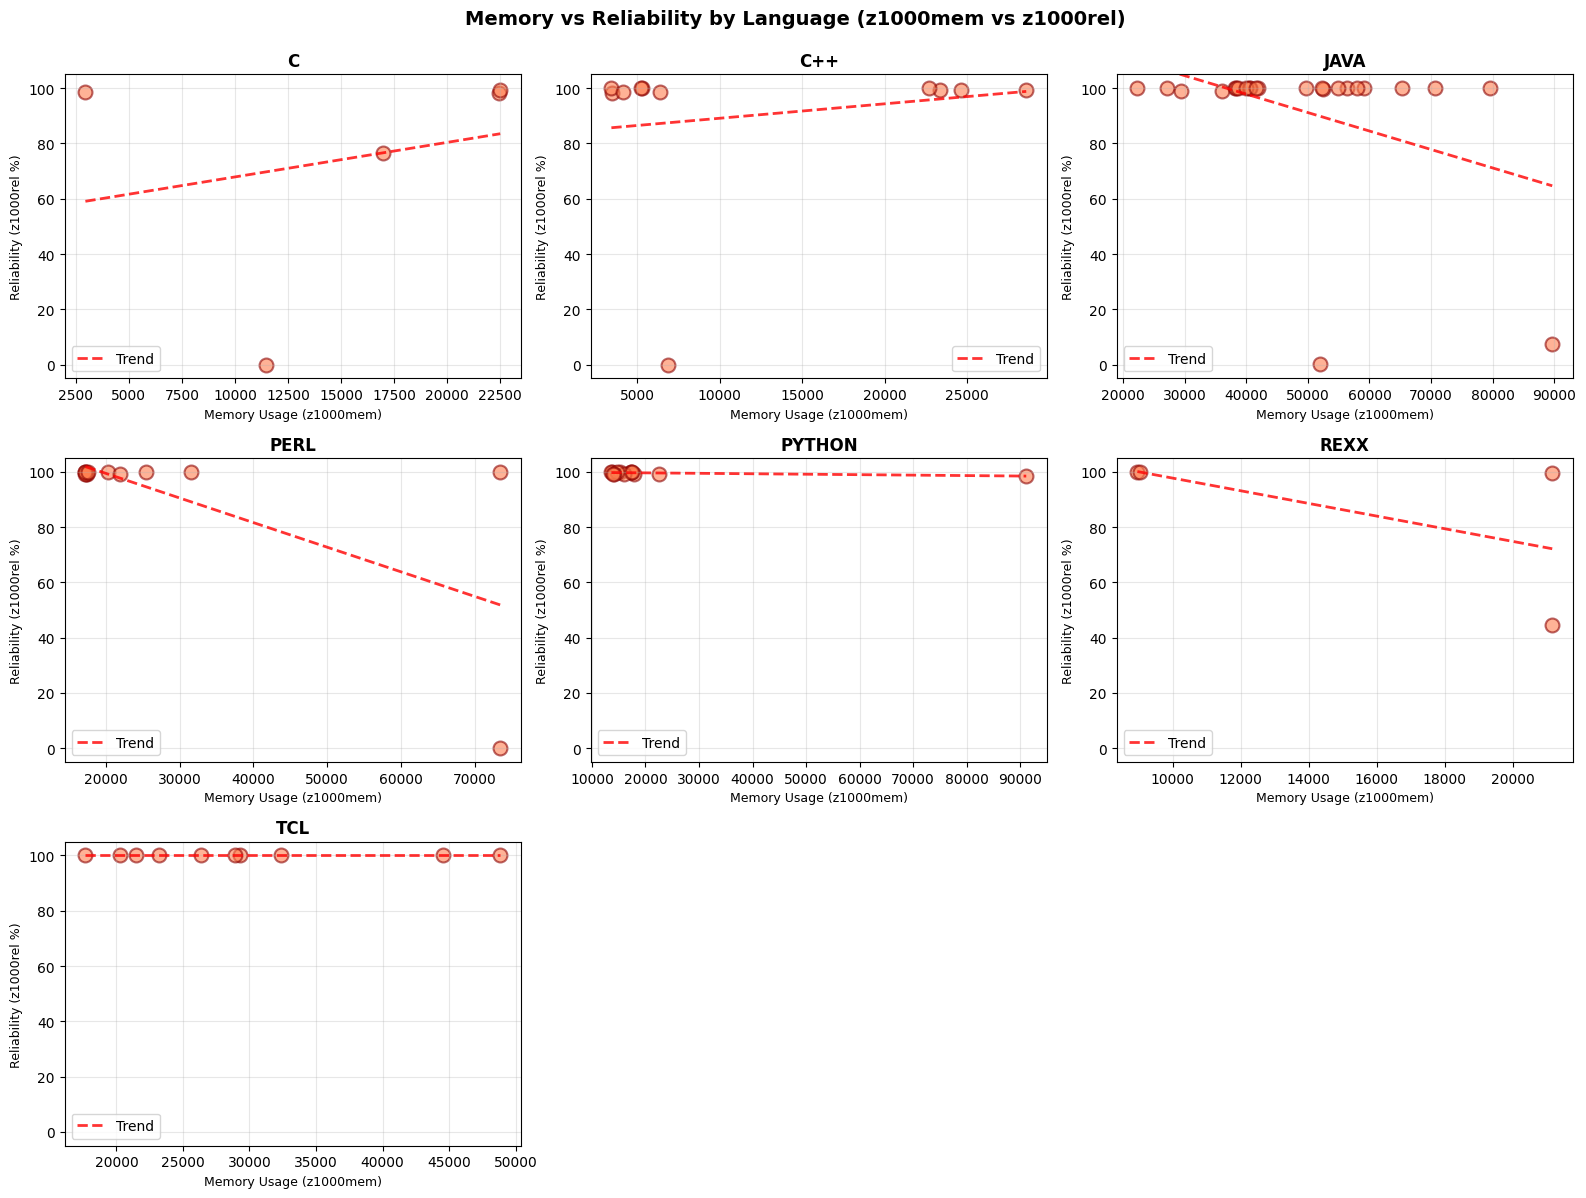


=== Summary Statistics by Language ===


C:
  Count: 5
  Memory (z1000mem) - Mean: 15257.60, Median: 16968.00
  Reliability (z1000rel) - Mean: 74.46, Median: 98.10

C++:
  Count: 11
  Memory (z1000mem) - Mean: 12188.36, Median: 6384.00
  Reliability (z1000rel) - Mean: 90.25, Median: 99.24

JAVA:
  Count: 24
  Memory (z1000mem) - Mean: 48933.33, Median: 45828.00
  Reliability (z1000rel) - Mean: 91.88, Median: 100.00

PERL:
  Count: 13
  Memory (z1000mem) - Mean: 28265.23, Median: 17576.00
  Reliability (z1000rel) - Mean: 92.07, Median: 100.00

PYTHON:
  Count: 13
  Memory (z1000mem) - Mean: 21920.00, Median: 16024.00
  Reliability (z1000rel) - Mean: 99.59, Median: 100.00

REXX:
  Count: 4
  Memory (z1000mem) - Mean: 15078.00, Median: 15096.00
  Reliability (z1000rel) - Mean: 86.09, Median: 99.81

TCL:
  Count: 10
  Memory (z1000mem) - Mean: 29288.80, Median: 27616.00
  Reliability (z1000rel) - Mean: 100.00, Median: 100.00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv', index_col=0)

# Normalize language names to lowercase
df['lang'] = df['lang'].str.lower()

# Remove rows with missing z1000mem or z1000rel values
df_clean = df.dropna(subset=['z1000mem', 'z1000rel'])

# Get unique languages
languages = sorted(df_clean['lang'].unique())

# Calculate grid dimensions (3 columns for layout)
n_langs = len(languages)
n_cols = 3
n_rows = (n_langs + n_cols - 1) // n_cols

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

# Generate a plot for each language
for idx, lang in enumerate(languages):
    ax = axes[idx]

    # Filter data for this language
    lang_data = df_clean[df_clean['lang'] == lang]

    # Create scatter plot
    ax.scatter(lang_data['z1000mem'], lang_data['z1000rel'],
               s=100, alpha=0.6, color='coral', edgecolors='darkred', linewidth=1.5)

    # Add trend line if there are at least 2 points
    if len(lang_data) >= 2:
        z = np.polyfit(lang_data['z1000mem'], lang_data['z1000rel'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(lang_data['z1000mem'].min(), lang_data['z1000mem'].max(), 100)
        ax.plot(x_trend, p(x_trend), "r--", linewidth=2, alpha=0.8, label='Trend')
        ax.legend(loc='best')

    # Set labels and title
    ax.set_xlabel('Memory Usage (z1000mem)', fontsize=9)
    ax.set_ylabel('Reliability (z1000rel %)', fontsize=9)
    ax.set_title(f'{lang.upper()}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([-5, 105])

# Hide extra subplots
for idx in range(len(languages), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Memory vs Reliability by Language (z1000mem vs z1000rel)',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('memory_vs_reliability_by_language.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'memory_vs_reliability_by_language.png'")
plt.show()

# Print summary statistics for each language
print("\n=== Summary Statistics by Language ===\n")
for lang in languages:
    lang_data = df_clean[df_clean['lang'] == lang]
    print(f"\n{lang.upper()}:")
    print(f"  Count: {len(lang_data)}")
    print(f"  Memory (z1000mem) - Mean: {lang_data['z1000mem'].mean():.2f}, Median: {lang_data['z1000mem'].median():.2f}")
    print(f"  Reliability (z1000rel) - Mean: {lang_data['z1000rel'].mean():.2f}, Median: {lang_data['z1000rel'].median():.2f}")

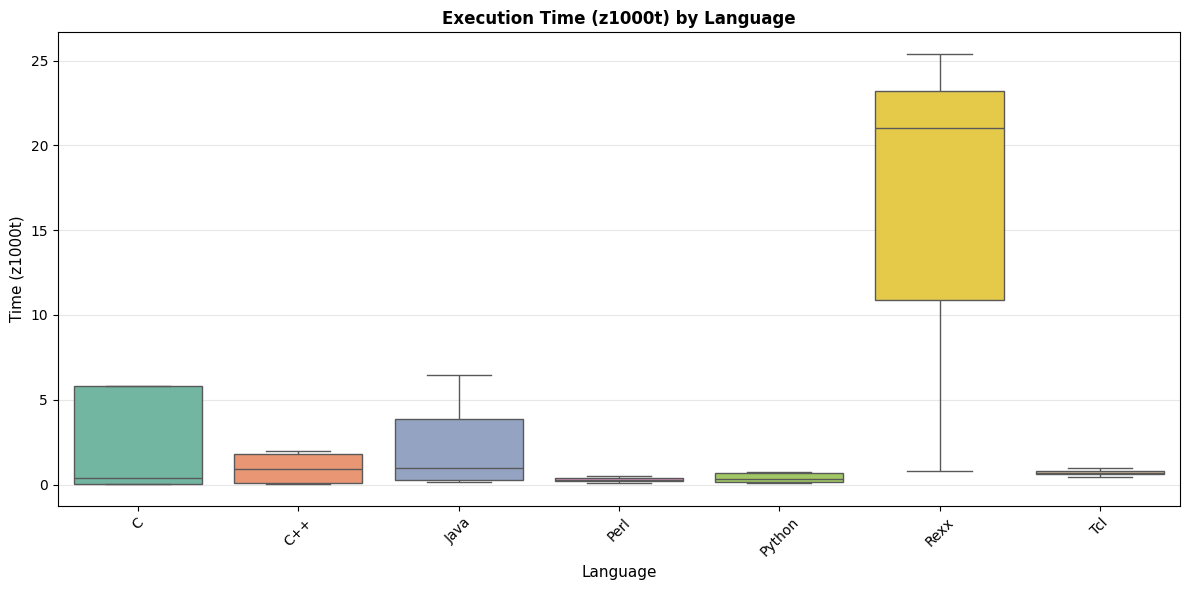

Data points: 74 rows

Execution Time Statistics by Language:
        count   mean    std   min    25%    50%    75%   max
lang                                                        
C         4.0   5.43  10.32  0.02   0.04   0.40   5.79  20.9
C++      11.0   2.97   6.28  0.03   0.07   0.92   1.83  21.4
Java     24.0   5.94  11.00  0.15   0.27   0.98   3.87  37.1
Perl     12.0   7.62  19.81  0.08   0.20   0.27   0.38  67.5
Python   12.0   6.43  20.75  0.08   0.13   0.35   0.67  72.3
Rexx      3.0  15.74  13.11  0.82  10.91  21.00  23.20  25.4
Tcl       8.0   4.27  10.16  0.47   0.60   0.67   0.83  29.4


In [4]:
# Boxplot 1: Execution Time (z1000t) by Language
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('assignment_3_dataset.csv')
df['lang'] = df['lang'].str.title()

plot_data = df[(df['z1000t'] <= 100) & (df['z1000t'].notna()) & (df['z1000mem'].notna())].copy()

fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=plot_data, x='lang', y='z1000t', ax=ax, hue='lang', palette='Set2', showfliers=False, legend=False)
ax.set_title('Execution Time (z1000t) by Language', fontsize=12, fontweight='bold')
ax.set_xlabel('Language', fontsize=11)
ax.set_ylabel('Time (z1000t)', fontsize=11)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Data points: {len(plot_data)} rows")
print("\nExecution Time Statistics by Language:")
print(plot_data.groupby('lang')['z1000t'].describe().round(2))

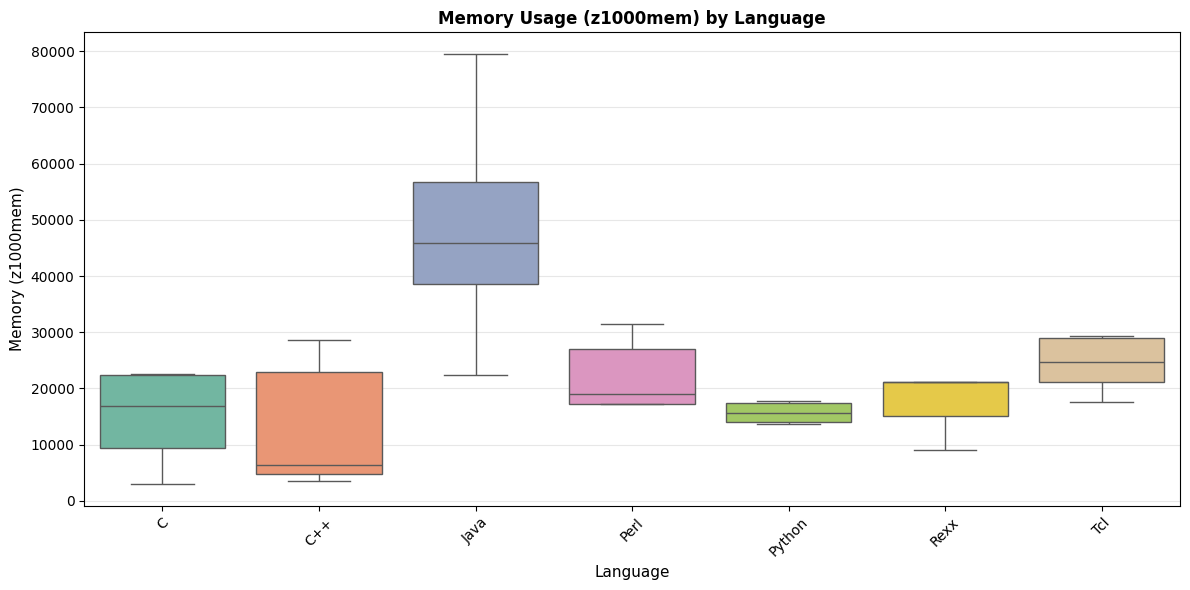

Data points: 74 rows

Memory Usage Statistics by Language:
        count      mean       std      min      25%      50%      75%      max
lang                                                                          
C         4.0  14830.00   9471.66   2952.0   9318.0  16936.0  22448.0  22496.0
C++      11.0  12188.36  10156.96   3448.0   4696.0   6384.0  23008.0  28568.0
Java     24.0  48933.33  16197.96  22328.0  38596.0  45828.0  56788.0  89664.0
Perl     12.0  29164.00  21135.89  17224.0  17292.0  18948.0  26940.0  73448.0
Python   12.0  16153.33   2584.99  13632.0  14036.0  15668.0  17372.0  22608.0
Rexx      3.0  17088.00   7032.13   8968.0  15056.0  21144.0  21148.0  21152.0
Tcl       8.0  26456.00   8379.74  17672.0  21160.0  24772.0  28978.0  44536.0


In [5]:
# Boxplot 2: Memory Usage (z1000mem) by Language
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('assignment_3_dataset.csv')
df['lang'] = df['lang'].str.title()

plot_data = df[(df['z1000t'] <= 100) & (df['z1000t'].notna()) & (df['z1000mem'].notna())].copy()

fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=plot_data, x='lang', y='z1000mem', ax=ax, hue='lang', palette='Set2', showfliers=False, legend=False)
ax.set_title('Memory Usage (z1000mem) by Language', fontsize=12, fontweight='bold')
ax.set_xlabel('Language', fontsize=11)
ax.set_ylabel('Memory (z1000mem)', fontsize=11)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Data points: {len(plot_data)} rows")
print("\nMemory Usage Statistics by Language:")
print(plot_data.groupby('lang')['z1000mem'].describe().round(2))

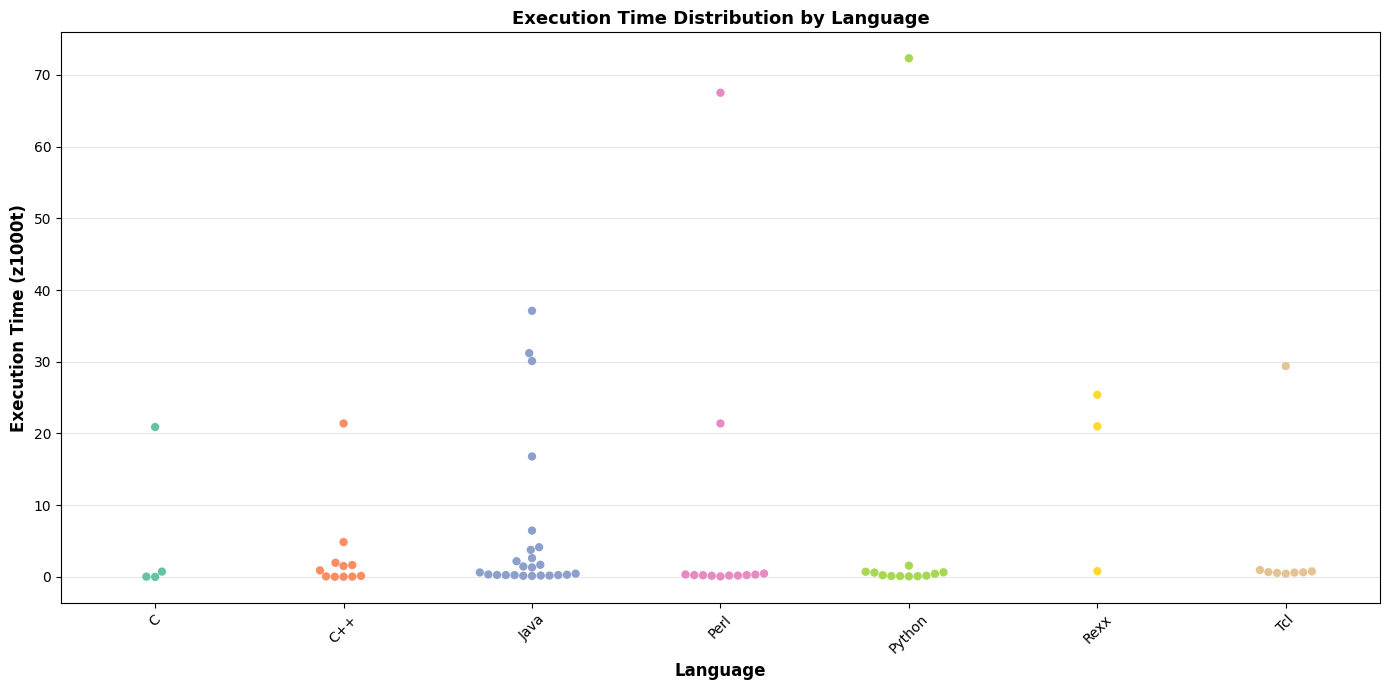


Data points: 74 rows

=== EXECUTION TIME STATISTICS BY LANGUAGE ===
        count   mean    std   min    25%    50%    75%   max
lang                                                        
C         4.0   5.43  10.32  0.02   0.04   0.40   5.79  20.9
C++      11.0   2.97   6.28  0.03   0.07   0.92   1.83  21.4
Java     24.0   5.94  11.00  0.15   0.27   0.98   3.87  37.1
Perl     12.0   7.62  19.81  0.08   0.20   0.27   0.38  67.5
Python   12.0   6.43  20.75  0.08   0.13   0.35   0.67  72.3
Rexx      3.0  15.74  13.11  0.82  10.91  21.00  23.20  25.4
Tcl       8.0   4.27  10.16  0.47   0.60   0.67   0.83  29.4


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv')
df['lang'] = df['lang'].str.title()
df['z1000t'] = pd.to_numeric(df['z1000t'], errors='coerce')

plot_data = df[(df['z1000t'] <= 100) & (df['z1000t'].notna())].copy()

# Create figure with just swarm plot
fig, ax = plt.subplots(figsize=(14, 7))

# Swarm plot with smaller marker size to fit all points
sns.swarmplot(data=plot_data, x='lang', y='z1000t', hue='lang', size=6, ax=ax, palette='Set2', legend=False)
ax.set_xlabel('Language', fontsize=12, fontweight='bold')
ax.set_ylabel('Execution Time (z1000t)', fontsize=12, fontweight='bold')
ax.set_title('Execution Time Distribution by Language', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nData points: {len(plot_data)} rows")
print("\n=== EXECUTION TIME STATISTICS BY LANGUAGE ===")
print(plot_data.groupby('lang')['z1000t'].describe().round(2))

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# ============================================================================
# SECTION 1: LOAD AND EXPLORE DATASET
# ============================================================================

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv', index_col=0)

print("Dataset Shape:", df.shape)
print("\nFirst Few Rows:")
print(df.head(10))
print("\nData Types:")
print(df.dtypes)

# ============================================================================
# SECTION 2: DATA CLEANING
# ============================================================================

df_clean = df.copy()

# Replace '??' and empty strings with NaN
df_clean = df_clean.replace('??', np.nan)
df_clean = df_clean.replace('', np.nan)

# Standardize language names to lowercase
df_clean['lang'] = df_clean['lang'].str.lower()

# Convert numeric columns
numeric_columns = ['z1000t', 'z0t', 'z1000mem', 'z1000rel', 'm1000rel', 'whours']
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("\nCleaned Dataset Summary:")
print(df_clean.describe())

# ============================================================================
# SECTION 3: PERFORMANCE vs RELIABILITY (z1000t vs z1000rel)
# ============================================================================

df_perf_rel = df_clean[['person', 'lang', 'z1000t', 'z1000rel']].dropna()



# By-language scatter plots
languages = sorted(df_perf_rel['lang'].unique())
n_langs = len(languages)
cols = 3
rows = (n_langs + cols - 1) // cols

fig2 = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f'{lang.upper()}' for lang in languages],
    specs=[[{'type': 'scatter'} for _ in range(cols)] for _ in range(rows)]
)

colors = px.colors.qualitative.Plotly

for idx, lang in enumerate(languages):
    row = idx // cols + 1
    col = idx % cols + 1
    lang_data = df_perf_rel[df_perf_rel['lang'] == lang]

    fig2.add_trace(
        go.Scatter(
            x=lang_data['z1000t'], y=lang_data['z1000rel'],
            mode='markers', marker=dict(size=8, color=colors[idx % len(colors)]),
            name=lang.upper(), text=lang_data['person'],
            hovertemplate='<b>%{text}</b><br>z1000t: %{x:.2f}<br>z1000rel: %{y:.2f}<extra></extra>',
            showlegend=False
        ), row=row, col=col
    )

    if len(lang_data) > 1:
        z = np.polyfit(lang_data['z1000t'], lang_data['z1000rel'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(lang_data['z1000t'].min(), lang_data['z1000t'].max(), 100)
        fig2.add_trace(
            go.Scatter(x=x_trend, y=p(x_trend), mode='lines',
                      line=dict(color='red', width=2, dash='dash'),
                      showlegend=False, hoverinfo='skip'),
            row=row, col=col
        )

fig2.update_layout(height=400*rows, width=1200, title_text='Performance vs Reliability by Language (z1000t vs z1000rel)', showlegend=False)
fig2.show()

# ============================================================================
# SECTION 4: MEMORY vs RELIABILITY (z1000mem vs m1000rel)
# ============================================================================

df_mem_rel = df_clean[['person', 'lang', 'z1000mem', 'm1000rel']].dropna()



# By-language scatter plots for memory
fig4 = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f'{lang.upper()}' for lang in languages],
    specs=[[{'type': 'scatter'} for _ in range(cols)] for _ in range(rows)]
)

for idx, lang in enumerate(languages):
    row = idx // cols + 1
    col = idx % cols + 1
    lang_data = df_mem_rel[df_mem_rel['lang'] == lang]

    fig4.add_trace(
        go.Scatter(
            x=lang_data['z1000mem'], y=lang_data['m1000rel'],
            mode='markers', marker=dict(size=8, color=colors[idx % len(colors)]),
            name=lang.upper(), text=lang_data['person'],
            hovertemplate='<b>%{text}</b><br>z1000mem: %{x:.0f}<br>m1000rel: %{y:.2f}<extra></extra>',
            showlegend=False
        ), row=row, col=col
    )

    if len(lang_data) > 1:
        z = np.polyfit(lang_data['z1000mem'], lang_data['m1000rel'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(lang_data['z1000mem'].min(), lang_data['z1000mem'].max(), 100)
        fig4.add_trace(
            go.Scatter(x=x_trend, y=p(x_trend), mode='lines',
                      line=dict(color='red', width=2, dash='dash'),
                      showlegend=False, hoverinfo='skip'),
            row=row, col=col
        )

fig4.update_layout(height=400*rows, width=1200, title_text='Memory vs Reliability by Language (z1000mem vs m1000rel)', showlegend=False)
fig4.show()

# ============================================================================
# SECTION 5: OUTLIER DETECTION
# ============================================================================

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound), lower_bound, upper_bound


df_analysis_mem = df_clean[['person', 'lang', 'z1000mem', 'm1000rel']].dropna()
df_analysis_mem['is_outlier'] = detect_outliers_iqr(df_analysis_mem['z1000mem'])[0]

fig10 = px.scatter(df_analysis_mem, x='z1000mem', y='m1000rel',
                   hover_data=['person', 'lang'],
                   title='z1000mem vs m1000rel',
                   template='plotly_white')
fig10.update_traces(marker=dict(size=10, color='#1f77b4'))
fig10.update_layout(height=600, width=1000, showlegend=False)
fig10.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)


Dataset Shape: (80, 10)

First Few Rows:
  person lang  z1000t    z0t  z1000mem  stmtL  z1000rel  m1000rel  whours caps
0   s018    c   0.017  0.017     22432   16.1     98.10      96.8    16.1   ??
1   s030    C     NaN  0.033     16968    4.0     76.47      92.1     4.0   ??
2   s036    c  20.900  0.000     11440    8.2      0.00      89.5     8.2   ??
3   s066    C   0.750  0.467      2952    7.3     98.48     100.0     7.3   ??
4   s078    c   0.050  0.050     22496   10.9     99.24      98.4    10.9   ??
5   s015  c++   0.050  0.050     24616   11.2     99.24     100.0    11.2   ??
6   s020  C++   1.983  0.550      6384    3.0     98.48      98.4     3.0   ??
7   s021  c++   4.867  0.017      5312    NaN    100.00      98.4     NaN   ??
8   s025  c++   0.083  0.083     28568    3.5     99.24      98.4     3.5   ??
9   s027  c++   1.533  0.000      3472   25.3     98.09     100.0    25.3   ??

Data Types:
person       object
lang         object
z1000t      float64
z0t         float


ANALYSIS COMPLETE
